Downloading the dataset using google drive and gdown (library to download google drive files).

In [ ]:
!pip install -q gdown
import gdown
import os
file_id = "1Zdn_evd9LJum4E7F6uqy0Gxt4r2wHKFR"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="MathE_dataset.zip", quiet=False)
!unzip -o MathE_dataset.zip -d MathE_dataset

Downloading...
From: https://drive.google.com/uc?id=1Zdn_evd9LJum4E7F6uqy0Gxt4r2wHKFR
To: /content/MathE_dataset.zip
100%|██████████| 72.4k/72.4k [00:00<00:00, 8.98MB/s]


Archive:  MathE_dataset.zip
  inflating: MathE_dataset/Machine Learning and Deep Learning Final Project Proposal.pdf  
  inflating: MathE_dataset/__MACOSX/._Machine Learning and Deep Learning Final Project Proposal.pdf  
  inflating: MathE_dataset/MathE dataset.csv  
  inflating: MathE_dataset/__MACOSX/._MathE dataset.csv  


Importing the file from the MathE dataset.csv file.

In [ ]:
import pandas as pd

# load the raw CSV file
df_raw = pd.read_csv("/content/MathE_dataset/MathE dataset.csv", sep=';', encoding='ISO-8859-1')

# renaming the columns directly
df_raw.columns = ['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
                  'Question Level', 'Topic', 'Subtopic', 'Keywords']
df = df_raw.dropna()
df['Type of Answer'] = df['Type of Answer'].astype(int)


# drop rows with missing data
# df = split_data.dropna()

# convert target column
df['Type of Answer'] = df['Type of Answer'].astype(int)




Embedding the dataset and label encoding it.  
Creating a sequential model for deep learning.

In [ ]:
# building of the pipeline (deep learning with embeddings)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

categorical_cols = ['Student ID', 'Student Country', 'Question ID',
                    'Question Level', 'Topic', 'Subtopic', 'Keywords']
target_col = 'Type of Answer'

# encoding categorical features
vocab_sizes = {}
encoded_inputs = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    vocab_sizes[col] = df[col].nunique()
    encoded_inputs[col] = df[col].values
y = df[target_col].values

# train/test split
X_train = {}
X_test = {}
for col in categorical_cols:
    X_train[col], X_test[col], y_train, y_test = train_test_split(
        encoded_inputs[col], y, test_size=0.2, random_state=42
    )

# deep learning model
# built a Deep Neural Network (DNN)
#created Embedding Layers for Each Feature
inputs = []
embeddings = []
for col in categorical_cols:
    input_layer = Input(shape=(1,), name=col)
    embed_dim = min(50, vocab_sizes[col] // 2 + 1) # suppose => country=> 5 unique values> 5//2+1=> 3 valeu input
    embed = Embedding(input_dim=vocab_sizes[col] + 1, output_dim=embed_dim)(input_layer)
    embed = Flatten()(embed)
    inputs.append(input_layer)
    embeddings.append(embed)

x = Concatenate()(embeddings)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)




Model fitting

In [ ]:
model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# Prepare dicts for model
# Trained Using All Categorical Features Together
train_dict = {col: X_train[col] for col in categorical_cols}
test_dict = {col: X_test[col] for col in categorical_cols}

# Train
model.fit(train_dict, y_train, validation_data=(test_dict, y_test), epochs=20, batch_size=32)

# Evaluate
loss, accuracy = model.evaluate(test_dict, y_test, verbose=0)
print(" Final Test Accuracy:", round(accuracy * 100, 2), "%")

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# Prepare dicts for model
# Trained Using All Categorical Features Together
train_dict = {col: X_train[col] for col in categorical_cols}
test_dict = {col: X_test[col] for col in categorical_cols}

# Train
model.fit(train_dict, y_train, validation_data=(test_dict, y_test), epochs=20, batch_size=32)

# Evaluate
loss, accuracy = model.evaluate(test_dict, y_test, verbose=0)
print(" Final Test Accuracy:", round(accuracy * 100, 2), "%")

Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5852 - loss: 0.6890 - val_accuracy: 0.5880 - val_loss: 0.6825
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6962 - loss: 0.5824 - val_accuracy: 0.6565 - val_loss: 0.6372
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7219 - loss: 0.5429 - val_accuracy: 0.6550 - val_loss: 0.6273
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7385 - loss: 0.5203 - val_accuracy: 0.6513 - val_loss: 0.6589
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7572 - loss: 0.4886 - val_accuracy: 0.6482 - val_loss: 0.6903
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7889 - loss: 0.4485 - val_accuracy: 0.6497 - val_loss: 0.7168
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8026 - loss: 0.4163 - val_accuracy: 0.6424 - val_loss: 0.7646
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8220 - loss: 0.3847 - val_accur

Checking the accuracy of the model.

In [ ]:
# using full data , we can skip this
full_input = {col: df[col].values for col in categorical_cols}
full_output = df['Type of Answer'].values

loss, overall_accuracy = model.evaluate(full_input, full_output, verbose=0)
print("Overall Accuracy:", round(overall_accuracy * 100, 2), "%")


Overall Accuracy: 85.16 %


Creating the confusion matrix.

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


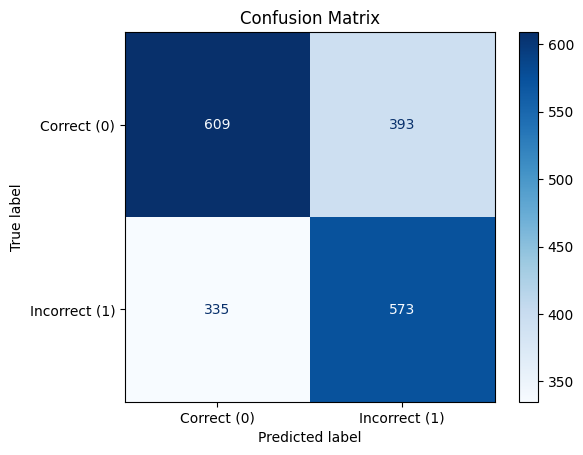

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities on test set
y_pred_probs = model.predict(test_dict)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Correct (0)", "Incorrect (1)"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Using another sequential model and training the model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


# Split features and label
X = df.drop(['Type of Answer'], axis=1)
y = df['Type of Answer']

# Normalize inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build DL model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5434 - loss: 0.6921 - val_accuracy: 0.5361 - val_loss: 0.6845
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5668 - loss: 0.6824 - val_accuracy: 0.5649 - val_loss: 0.6806
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5643 - loss: 0.6785 - val_accuracy: 0.5681 - val_loss: 0.6792
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5776 - loss: 0.6781 - val_accuracy: 0.5602 - val_loss: 0.6774
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5833 - loss: 0.6734 - val_accuracy: 0.5675 - val_loss: 0.6776
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5749 - loss: 0.6763 - val_accuracy: 0.5644 - val_loss: 0.6778
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5743 - loss: 0.6763 - val_accuracy: 0.5644 - val_loss: 0.6776
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5909 - loss: 0.6706 - val_accuracy: 0.5639 - val_

Plotting the model accuracy, training vs validation accuracy.

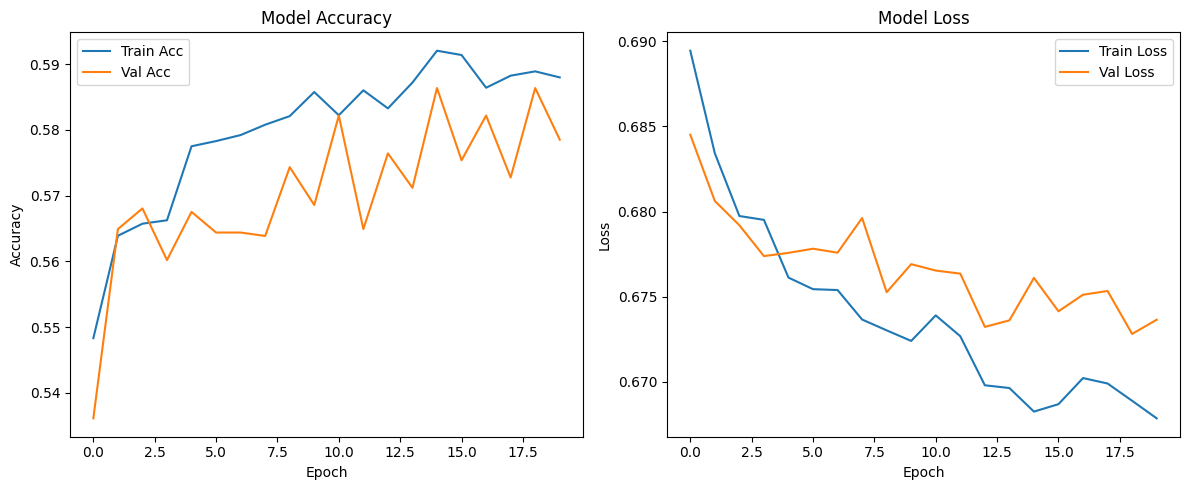

In [ ]:
# Now plot accuracy and loss curves:
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


Printing out the final Accuracy in text form.

In [ ]:
# Final epoch values
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print("\n Final Epoch Metrics:")
print(f"Training Accuracy: {final_train_acc:.2f}")
print(f"Validation Accuracy: {final_val_acc:.2f}")
print(f"Training Loss: {final_train_loss:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")



 Final Epoch Metrics:
Training Accuracy: 0.59
Validation Accuracy: 0.58
Training Loss: 0.6678
Validation Loss: 0.6736


Plotting the Training and validation accuracy.

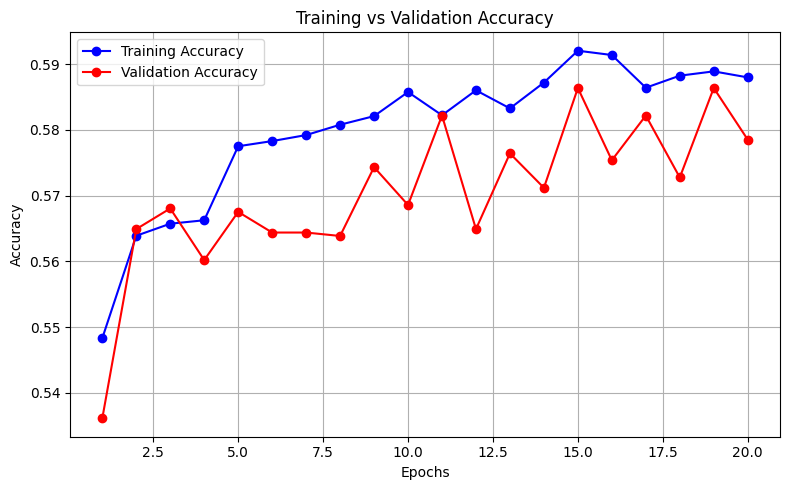

In [ ]:
import matplotlib.pyplot as plt

# Extract values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot accuracy vs validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
